In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando los datos del df
folder = 'D:/Llanos/{}'.format
df = pd.read_excel(folder('house_data.xlsx'))

 <h1>1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso
 exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que
 puedan afectar la calidad del modelo, si los hay</h1>

<h1><span style="color: #ff0000;">1. Exploración de datos</span></h1>


<ul><h2><span style="color: #000000;">a. Revisando las columnas y sus tipos de datos.</span></h></ul>


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<ul><h2><span style="color: #000000;">b. Buscando datos nulos.</span></h></ul>


In [177]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- No existen datos nulos en el df

<ul><h2><span style="color: #000000;">b. Buscando datos duplicados.</span></h></ul>


In [178]:
df.duplicated().sum()

0

- No exiten datos duplicados

<h1>2. Realizar un análisis descriptivo de las variables para entender la distribución de los
 datos y detectar posibles relaciones entre las características y los precios. En esto
 debes incluir un análisis de correlaciones entre las variables principalmente con el
 precio de las casas</h1>

<ul><h2><span style="color: #000000;">d. Revisando los principales estadisticos</span></h></ul>


In [179]:
df.describe().style.format('{:.2f}'.format)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


__Price__
- El valor mínimo y maximo de price se encuentran bastantes alejados del promedio.
    - Como se puede ver la mayoria de los datos se encuentran bajo los 645000.

__bedrroms__
- En promedio el número de habitaciones es de 3 con un mínimo de 0 lo que es raro ya que como una casa no va a tener 1 habitación.
- Lo otro que llama la atención es que el máximo de habitaciones es de 33.

__bathrooms__
- El promedio de baño es de 2 y al igual que en bedrooms existen casas con 0 baños, lo que es dificil de creer ya que las personas tienen necesidades biológicas.
- Hay una casa que tiene 8 baños

__sqft_living__
- El promedio de ft cuadrados habitables es de 2079, donde el mínimo es 918 bastante lejos del promedio al igual que el máximo es de 13540 lo que es 6 veces mayor.

__sqft_lot__
- La desviación estandar de los datos es bastante grande, además tanto los valores mínimos como máximos se alejan bastante del promedio.

__floors__
- En promedio las casas tienen casi 2 pisos. El mínimo está bien pero el máximo dice 3.5 lo que quiere decir que puede existir un piso mediano???

__views__
- Según lo que encontré indica que tan buena es la vista de la casa

__grade__
- Según lo que he investigado grade sería que tan buena es la construcción de un mínimo de 1 a 13. Con los datos vemos que en general se encuentran bien valoradas con un 7.66

__sqft_above__ y __sqft_basment__
- Estos datos deberian ser complementarios y deberian ser igual al sqft_living, lo que se puede corroborar al sumar sus promedios y ver que coincide con el sqft_living.

__yr_built__
- Con los datos podemos ver que el promedio de las casas de este dataset son relativamente viejas considerando que son del 1971 (el 75 % de los datos son más viejos o tan viejos que 1997), la desviación estandar es baja. 

__yr_renovated__

- Asumo que debe ser si se ha renovado la construcción. Según los datos la mayoria no, ya que la mayor parte de los datos están como 0.

__zip_code__, __lat__, __long__
- No mucho que decir aparte que es el codio postal

__sqft_living15__ y __sqft_lot15__

- Corresponde a que tan lejos se encuentran las 15 casas más proximas

<ul><h2><span style="color: #000000;">e. Resolviendo problemas en los datos</span></h></ul>


- __Casas con 0 habitaciones?__

In [180]:
df[df['bedrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


- Si fuera otro el sentido de los datos cambiaria date a datetime pero como vamos a entrenar un modelo no necesitamos este dato
- Hay casas donde hay 0 habitaciones y hay más de un piso y los años de construcción son viejos como para ser inmuebles que se construyeron hace poco y por eso no tienen habitaciones pero este no es el caso.
- Por lo tanto vamos a eliminar estos datos

In [181]:
# Sacando los datos donde hay 0 habitaciones
df = df[~(df['bedrooms']==0)]

- __Casa con 33 habitaciones? o mas de 8 ?__

In [182]:
df_bdr_max = df[df['bedrooms']>=8].sort_values(by='price', ascending=False)
df_bdr_max

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18477,1346300150,20141020T000000,3300000,8,4.00,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
4035,685000115,20141007T000000,2150000,8,6.00,4340,9415,2.0,0,0,...,8,4340,0,1967,0,98004,47.6316,-122.202,2050,9100
17235,1338600225,20140528T000000,1970000,8,3.50,4440,6480,2.0,0,3,...,10,3140,1300,1959,0,98112,47.6310,-122.303,4440,8640
10958,1652500060,20140711T000000,1650000,8,2.75,4040,20666,1.0,0,0,...,9,2020,2020,1962,0,98004,47.6340,-122.221,3670,20500
16844,8823900290,20150317T000000,1400000,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
6079,9822700190,20140808T000000,1280000,9,4.50,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
13314,627300145,20140814T000000,1148000,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
18443,8823901445,20150313T000000,934000,9,3.00,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
9452,2769600590,20141016T000000,900000,8,4.00,4020,7500,1.0,0,0,...,8,2010,2010,1968,0,98107,47.6732,-122.363,1560,3737
12885,8813400155,20141219T000000,808000,8,3.75,3460,4600,2.0,0,0,...,7,2860,600,1987,0,98105,47.6617,-122.289,2170,3750


 ### Gráfico Piezas y baños 

Text(0.5, 1.0, 'Cantidad de habitaciones según la cantidad de baños')

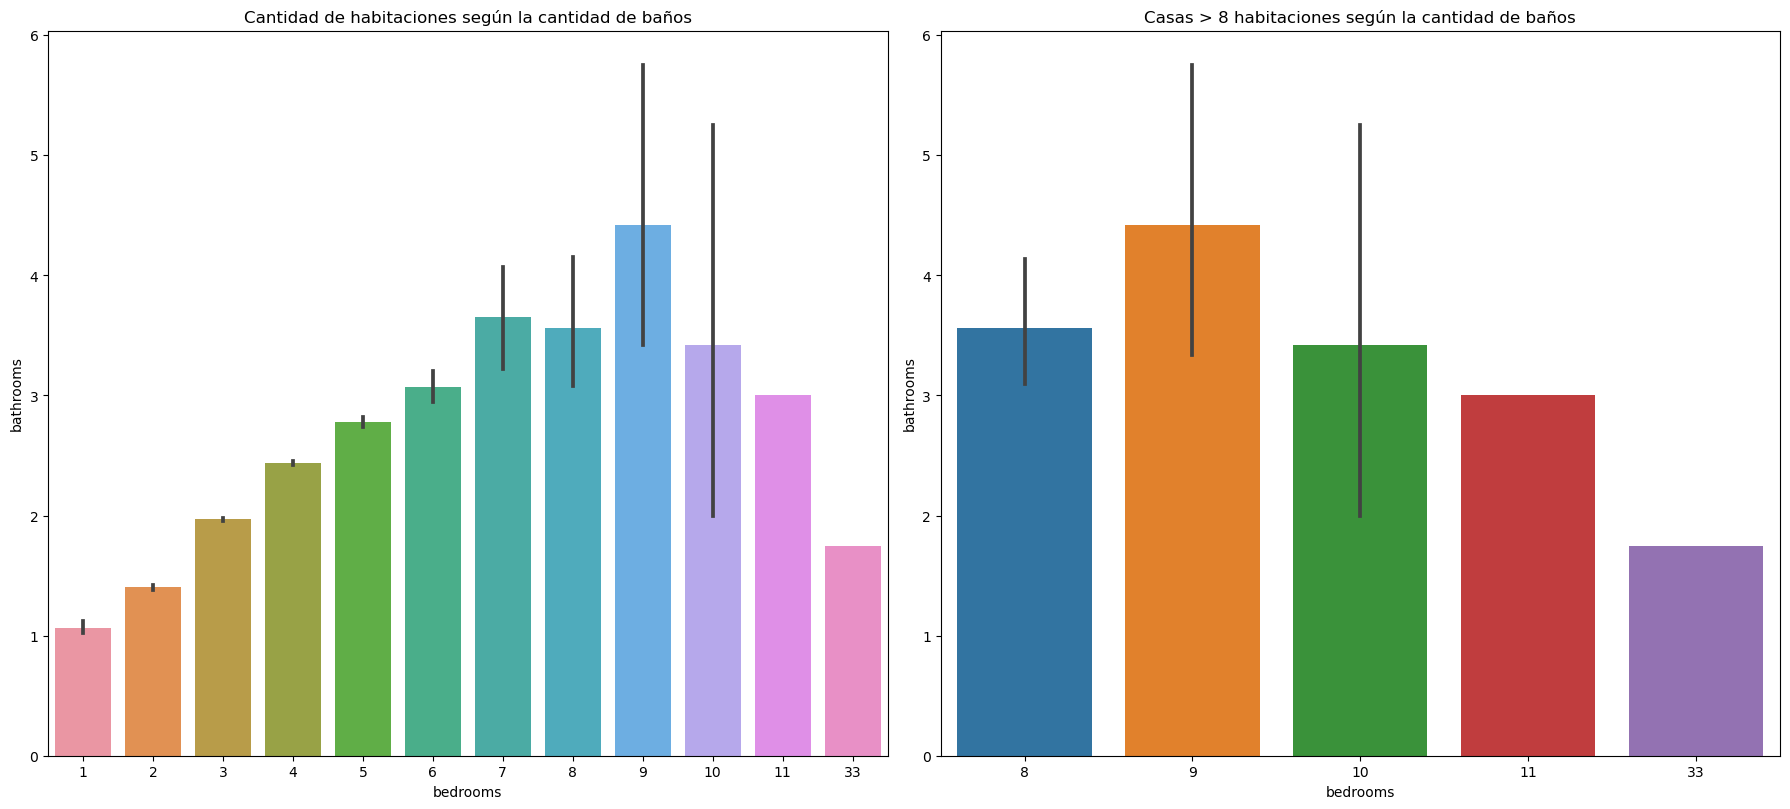

In [183]:
fig,ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=df_bdr_max, x='bedrooms', y='bathrooms', ax= ax[1])
sns.barplot(data=df, x='bedrooms', y='bathrooms', ax= ax[0])
fig.tight_layout()
ax[1].set_title('Casas > 8 habitaciones según la cantidad de baños')
ax[0].set_title('Cantidad de habitaciones según la cantidad de baños')


- Como podemos ver en el grafico 1 las casas desde 1 a 7 habitaciones tiene en general un numero creciente de baños lo que en teoria es lógico
- También podemos ver que después de las 7 habitaciones en la 8 cae la cantidad de baños pero ligeramente lo que quizas puede ser normal  o exista algun dato raro.
- Después en el 9 sigue la relación creciente pero ya después en 10, 11 y 33 ya caen los baños lo que es bastante raro además la variación es extremadamente alto.

 ### Gráfico Piezas y precios


Text(0.5, 1.0, 'Cantidad de habitaciones según la cantidad de baños')

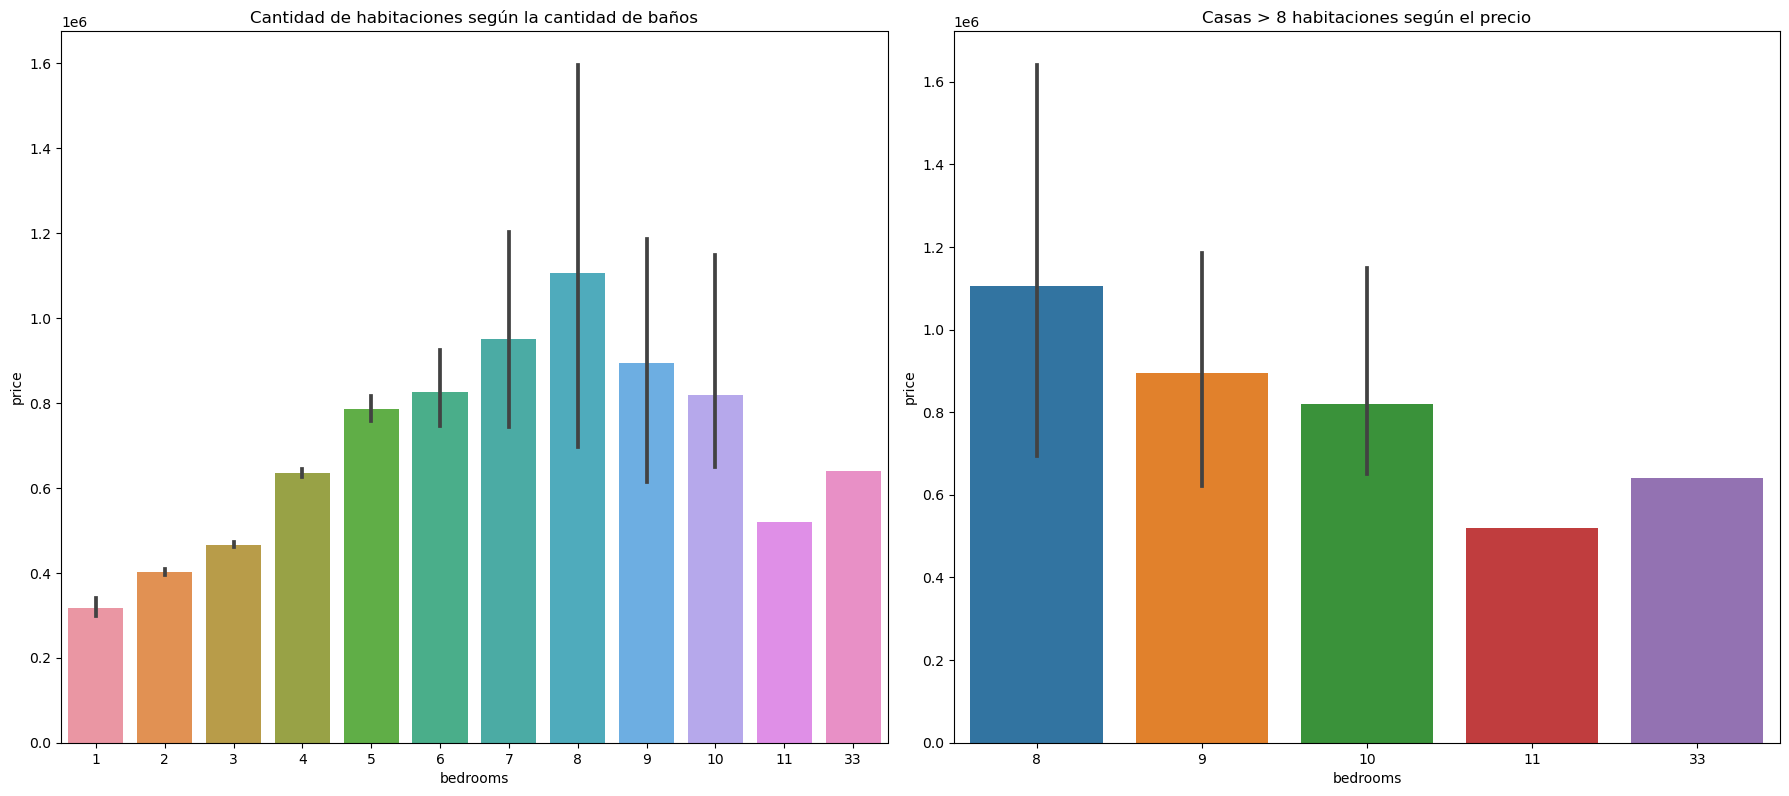

In [184]:
fig,ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=df_bdr_max, x='bedrooms', y='price', ax= ax[1])
sns.barplot(data=df, x='bedrooms', y='price', ax= ax[0])
fig.tight_layout()
ax[1].set_title('Casas > 8 habitaciones según el precio')
ax[0].set_title('Cantidad de habitaciones según la cantidad de baños')

- Es claro notar que las 33 habitaciones son datos mal todomados debido principalmente a el precio y además los baños

 ### cantidad de piezas por  y area para vivir


Text(0.5, 1.0, 'Cantidad de habitaciones según la cantidad de ft2 para vivir')

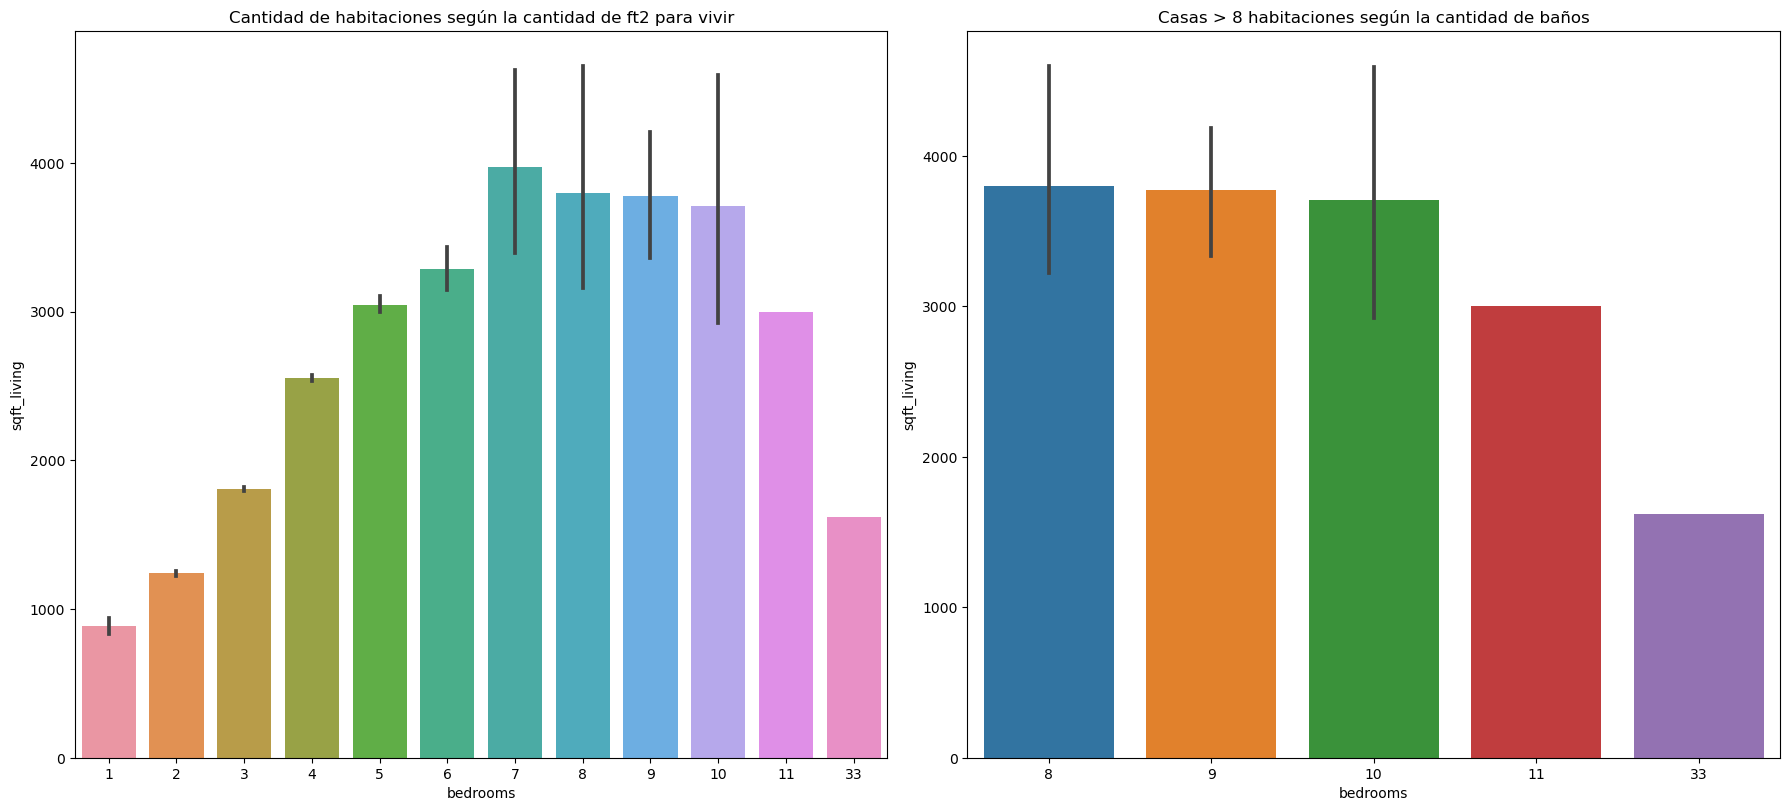

In [185]:
fig,ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=df_bdr_max, x='bedrooms', y='sqft_living', ax= ax[1])
sns.barplot(data=df, x='bedrooms', y='sqft_living', ax= ax[0])
fig.tight_layout()
ax[1].set_title('Casas > 8 habitaciones según la cantidad de baños')
ax[0].set_title('Cantidad de habitaciones según la cantidad de ft2 para vivir')

- Por lo tanto consideraremos como outliers 11 y 33 habitaciones removiendolos del df

In [186]:
df = df[~((df['bedrooms'] == 11) | (df['bedrooms'] == 33))] 


## Revisando la columna Baños vs Precios

Text(0.5, 1.0, 'Cantidad de habitaciones según la cantidad de baños')

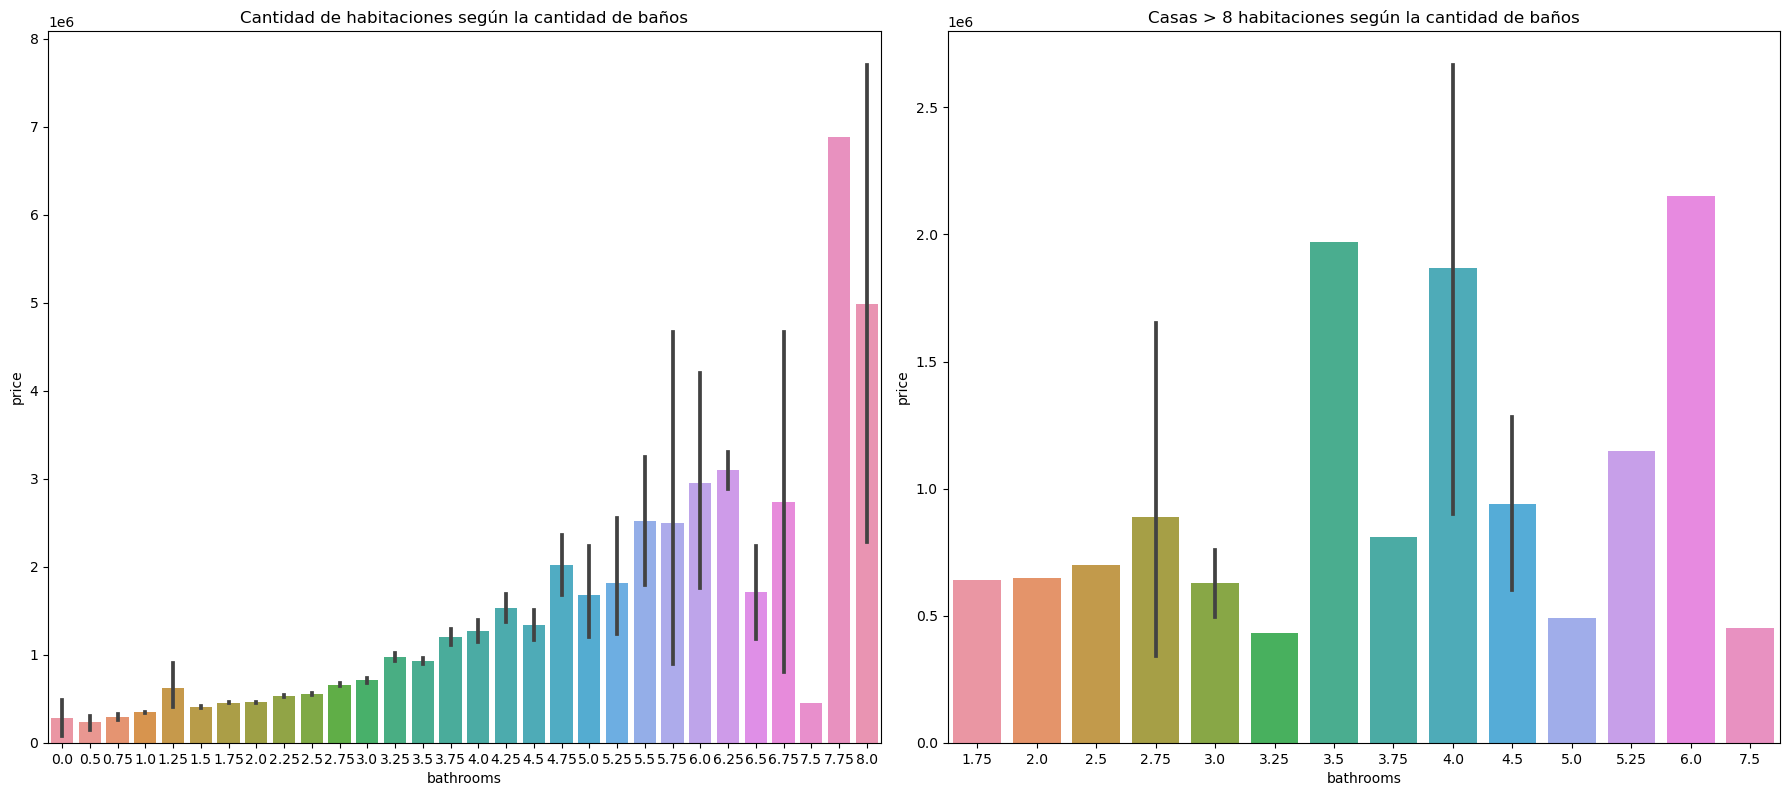

In [187]:
fig,ax = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(data=df_bdr_max, x='bathrooms', y='price', ax= ax[1])
sns.barplot(data=df, x='bathrooms', y='price', ax= ax[0])
fig.tight_layout()
ax[1].set_title('Casas > 8 habitaciones según la cantidad de baños')
ax[0].set_title('Cantidad de habitaciones según la cantidad de baños')

### Revisando aquellos lugares con 0 baños lo que es realmente extraño

In [188]:
df[df['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
5832,5702500050,20141104T000000,280000,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
10481,203100435,20140918T000000,484000,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


- Sacando estos datos ya que una casa sin baño no puede ser representativa de nuestros datos además son solo 3 datos

In [189]:
# Eliminando los datos con 0 baños
df = df[~(df['bathrooms']==0)]

## Por qué 7.5 baños vale tan barato?

In [190]:
df[df['bathrooms']==7.5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8546,424049043,20140811T000000,450000,9,7.5,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866


In [191]:
df[(df['bathrooms']>=7.5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8546,424049043,20140811T000000,450000,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,20140505T000000,2280000,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


- Lo primero que salta es que para los 7.5 baños hay bastante poco sqft_living y sqft_lot, además que el precio es demasiado bajo. Para nuestro análisis seria mejor quitarlo

In [192]:
df = df[~(df['bathrooms']==7.5)]

## Por que hay pisos con  1.5, 2.5 y 3.5 float?

In [193]:
df['floors'].value_counts()

1.0    10672
2.0     8233
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

- Son más comunes las casas con 1 piso.
- Aproximadamente el 90.35% de las casas tienen un número entero de pisos (1.0, 2.0 y 3.0), mientras que alrededor del 9.65% tienen un número decimal de pisos (1.5, 2.5 y 3.5).
- Por lo que google los 0.5 representan un piso mediano como un atico

Text(0.5, 1.0, 'Pisos y sus precios')

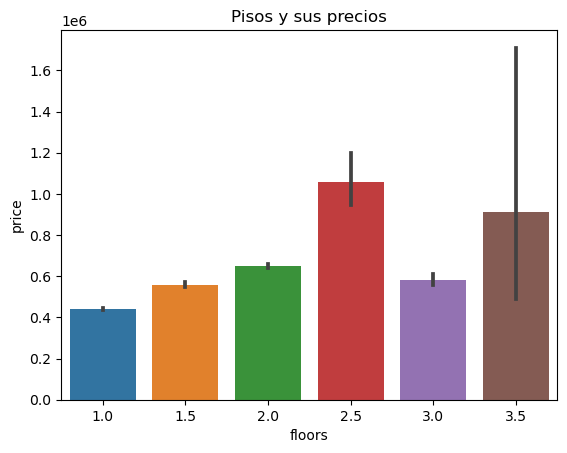

In [194]:
sns.barplot(x=df['floors'], y=df['price'], data=df)
plt.title('Pisos y sus precios')

- En general entre más piso tenga son más caros, aúnque los pisos con 2.5 tienen un alto valor pero quizas se puede deber a otra cosa

In [195]:
df[df['floors']==2.5].sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
2444,7524900003,20141210T000000,3278000,2,1.75,6840,10000,2.5,1,4,...,11,4350,2490,2001,0,98008,47.6042,-122.112,3120,12300
7191,7159200005,20140507T000000,3200000,7,4.50,6210,8856,2.5,0,2,...,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400
7907,1068000375,20140923T000000,3200000,6,5.00,7100,18200,2.5,0,0,...,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
15258,1732800780,20150212T000000,3065000,5,3.00,4150,7500,2.5,0,4,...,11,3510,640,1909,0,98119,47.6303,-122.362,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,2620069195,20141104T000000,340000,4,1.75,2140,11651,2.5,0,0,...,8,2140,0,1930,2001,98022,47.1960,-122.006,2030,10978
17492,1615900020,20150320T000000,325000,6,2.00,2780,13950,2.5,0,0,...,7,2780,0,1955,1964,98030,47.3738,-122.226,2120,13950
15494,4021100095,20150121T000000,290000,4,1.75,1820,22043,2.5,0,0,...,7,1820,0,1918,0,98155,47.7606,-122.280,1880,19961
4702,4013800131,20140807T000000,267500,2,1.00,1747,12250,2.5,0,0,...,6,1747,0,1948,0,98001,47.3282,-122.285,1620,10300


- Según lo que se entiende de los datos 0.5 viene dado de tener sqft_above > 0

## Revisando  que sqft_above + sqft_basement sea igual a sqft_living para corroborar los datos

In [196]:
len(df)

21594

In [197]:
df[df['sqft_above'] + df['sqft_basement'] == df['sqft_living']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- Para todas las columnas se cumple que sqft_above + sqft_basement sea igual a sqft_living

## viendo la columa yr_built

In [198]:
df['yr_built'].describe()

count    21594.000000
mean      1971.002084
std         29.374114
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

- Es una columna de años pero está en int
- Quizas sea una buena idea usar esta columna y el minimo para restar esta fecha a las fechas mas cercanas

In [199]:
df['date']= pd.to_datetime(df['date']).dt.year

In [200]:
df['antiquity'] = df['date'] - df['yr_built']

In [201]:
df['antiquity'].describe() # existe una columna con -1, hay que revisar

count    21594.000000
mean        43.320922
std         29.376191
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: antiquity, dtype: float64

In [202]:

import numpy as np

np.where(df['antiquity'],-1,1)

array([-1, -1, -1, ..., -1, -1, -1])

In [203]:
# Reemplaando los valores negativos por 0
df['antiquity'] = np.where(df['antiquity']==-1, 0, df['antiquity'] )

In [204]:
df['antiquity'].describe()

count    21594.000000
mean        43.321478
std         29.375362
min          0.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: antiquity, dtype: float64

In [205]:
df['renovation_yr'] =df['date'] - df['yr_built']

In [206]:
df['renovation_yr'].describe()

count    21594.000000
mean        43.320922
std         29.376191
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: renovation_yr, dtype: float64

In [207]:
# Reemplaando los valores negativos por 0
df['renovation_yr'] = np.where(df['renovation_yr']==-1, 0, df['antiquity'] )


<h1><span style="color: #ff0000;">Revisando las variables Numéricas</span></h1>


In [208]:
# Lista variables numéricas
numeric_cols = [ col for col in df.columns if df[col].dtypes!='Object' and col!='id']

df_numeric = df.copy()
df_numeric = df_numeric[numeric_cols]
df_numeric


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,antiquity,renovation_yr
0,2014,221900,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,59,59
1,2014,538000,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,63
2,2015,180000,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,82,82
3,2014,604000,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,49,49
4,2015,510000,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,5
21609,2015,400000,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,1,1
21610,2014,402101,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,5,5
21611,2015,400000,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,11,11


- Revisando las variables discretas

In [209]:
numerico_discreto = [col for col in df_numeric if len(df_numeric[col].unique())<31]
df_numerico_discreto = df[numerico_discreto]
df_numerico_discreto


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,2014,3,1.00,1.0,0,0,3,7
1,2014,3,2.25,2.0,0,0,3,7
2,2015,2,1.00,1.0,0,0,3,6
3,2014,4,3.00,1.0,0,0,5,7
4,2015,3,2.00,1.0,0,0,3,8
...,...,...,...,...,...,...,...,...
21608,2014,3,2.50,3.0,0,0,3,8
21609,2015,4,2.50,2.0,0,0,3,8
21610,2014,2,0.75,2.0,0,0,3,7
21611,2015,3,2.50,2.0,0,0,3,8


- Revisando las variables continuas

In [210]:
numerico_continuo = [col for col in numeric_cols if col not in numerico_discreto and not 'yr' in col and not 'date' in col and not 'zipcode' in col]
df_numerico_continuo = df[numerico_continuo]
df_numerico_continuo


,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,antiquity
0,221900,1180,5650,1180,0,47.5112,-122.257,1340,5650,59
1,538000,2570,7242,2170,400,47.7210,-122.319,1690,7639,63
2,180000,770,10000,770,0,47.7379,-122.233,2720,8062,82
3,604000,1960,5000,1050,910,47.5208,-122.393,1360,5000,49
4,510000,1680,8080,1680,0,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...
21608,360000,1530,1131,1530,0,47.6993,-122.346,1530,1509,5
21609,400000,2310,5813,2310,0,47.5107,-122.362,1830,7200,1
21610,402101,1020,1350,1020,0,47.5944,-122.299,1020,2007,5
21611,400000,1600,2388,1600,0,47.5345,-122.069,1410,1287,11


<h1><span style="color: #ff0000;">Examinando las distribuciones de las variables continuas.</span></h1>


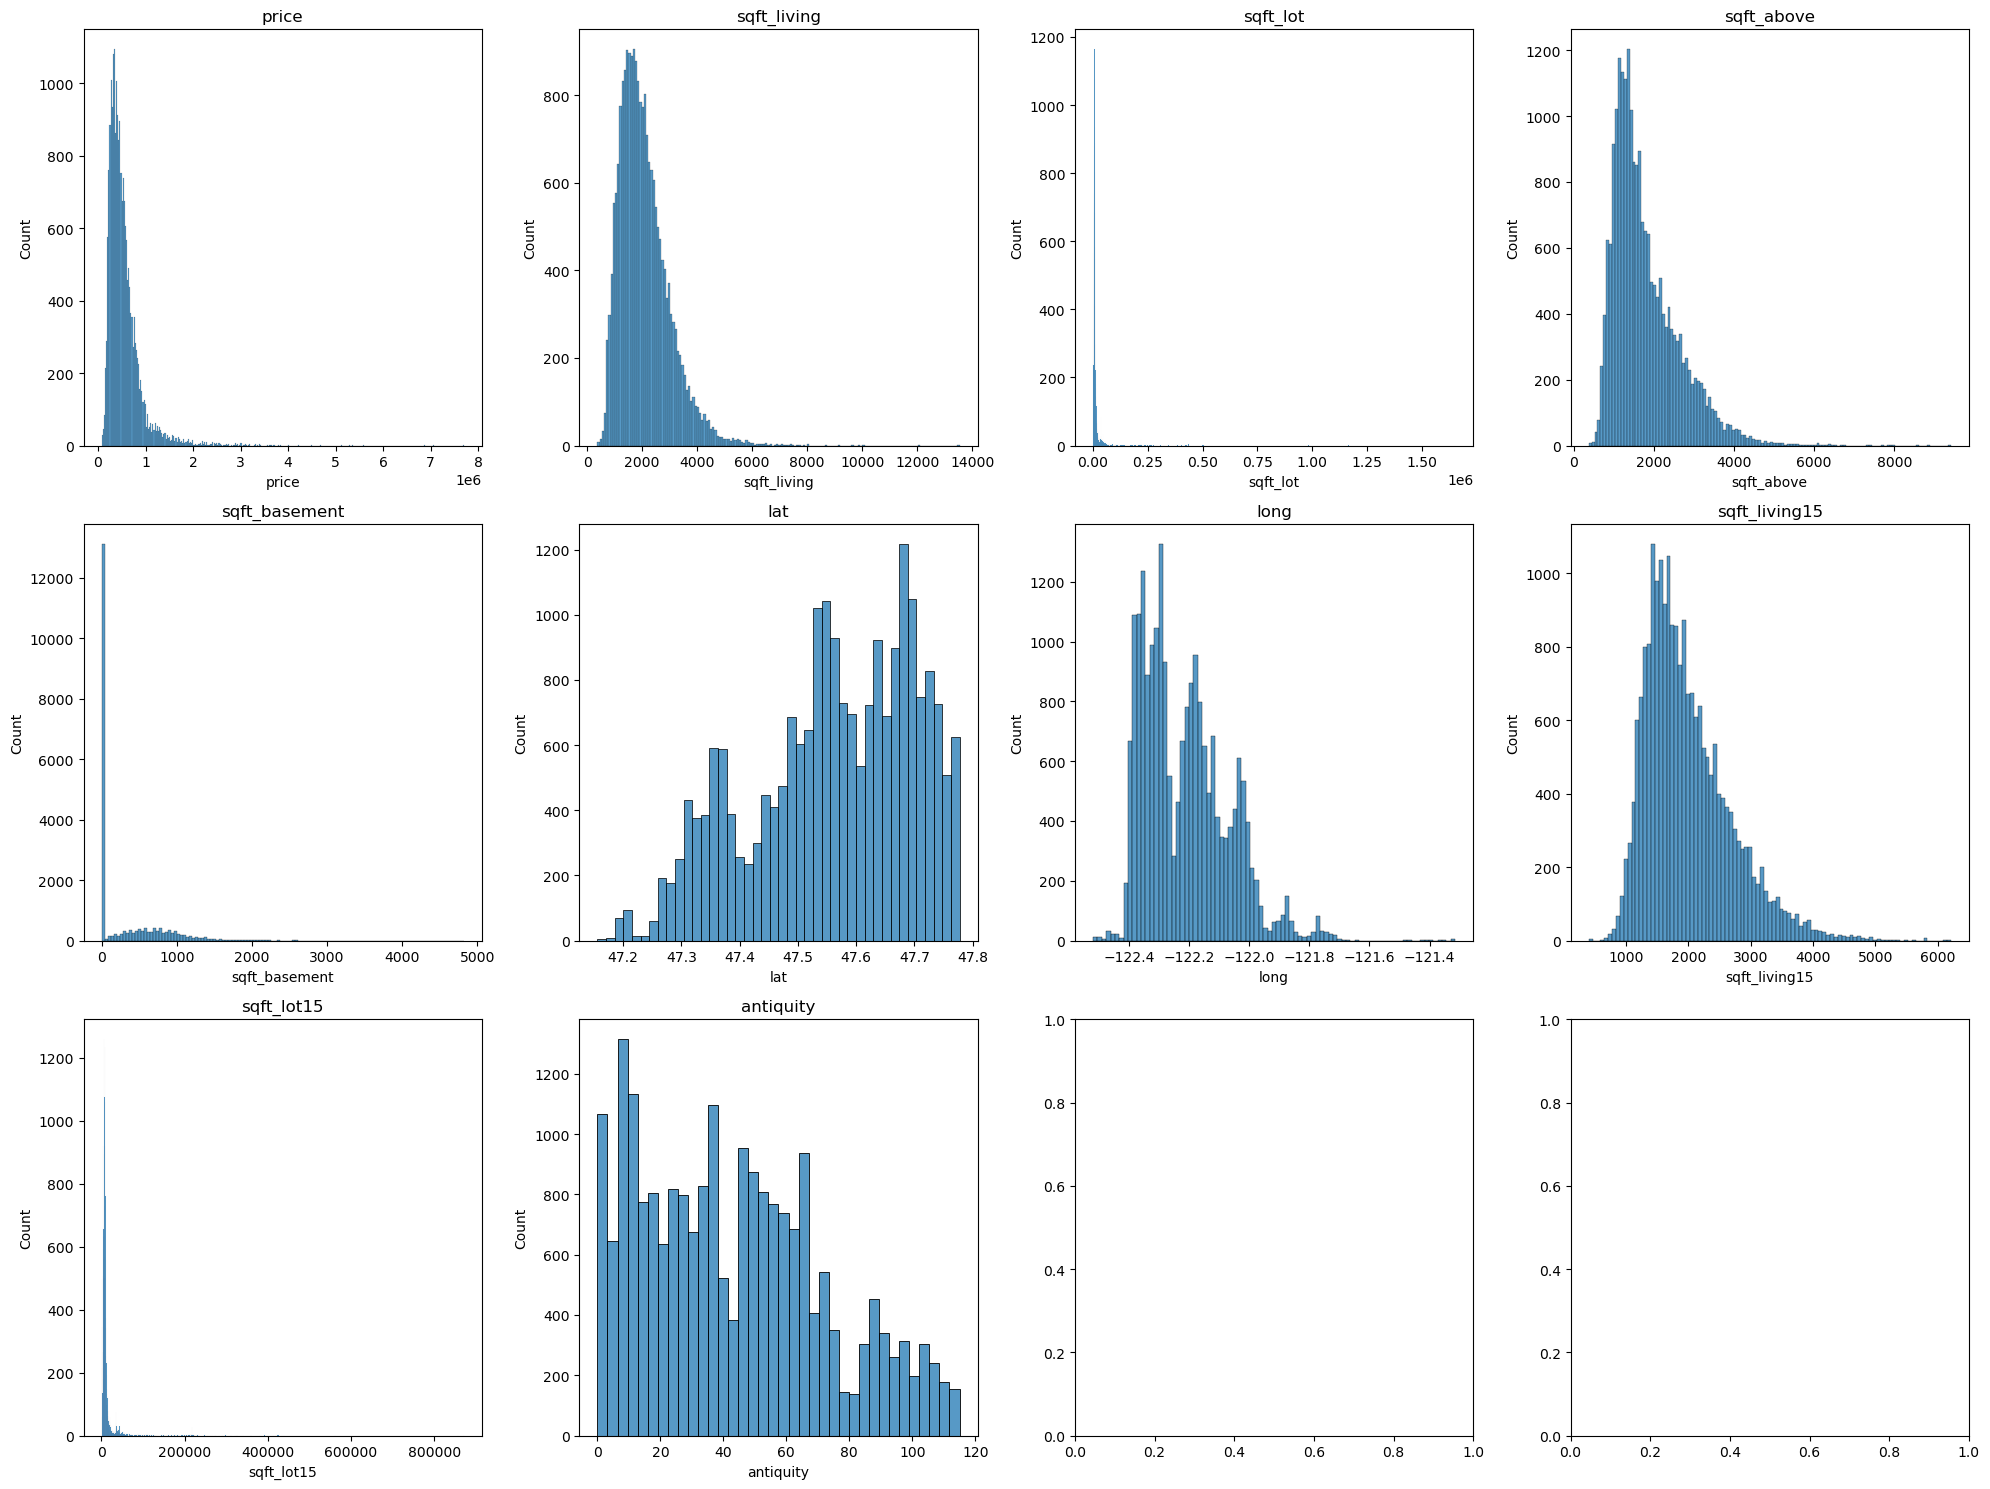

In [211]:
# Histograma variavles continuas 
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i, col in enumerate(df_numerico_continuo.columns):

    sns.histplot(x=df_numerico_continuo[col], ax=ax[i // 4, i % 4])
    ax[i//4, i%4].set_title(col)

plt.tight_layout()


- Podemos observar que la mayoria de los datos se encuentran con un skew hacia la derecha, no encontrandose normalte distribuidas.
- Quizás una buena idea seria aplicar log para ver si mejora

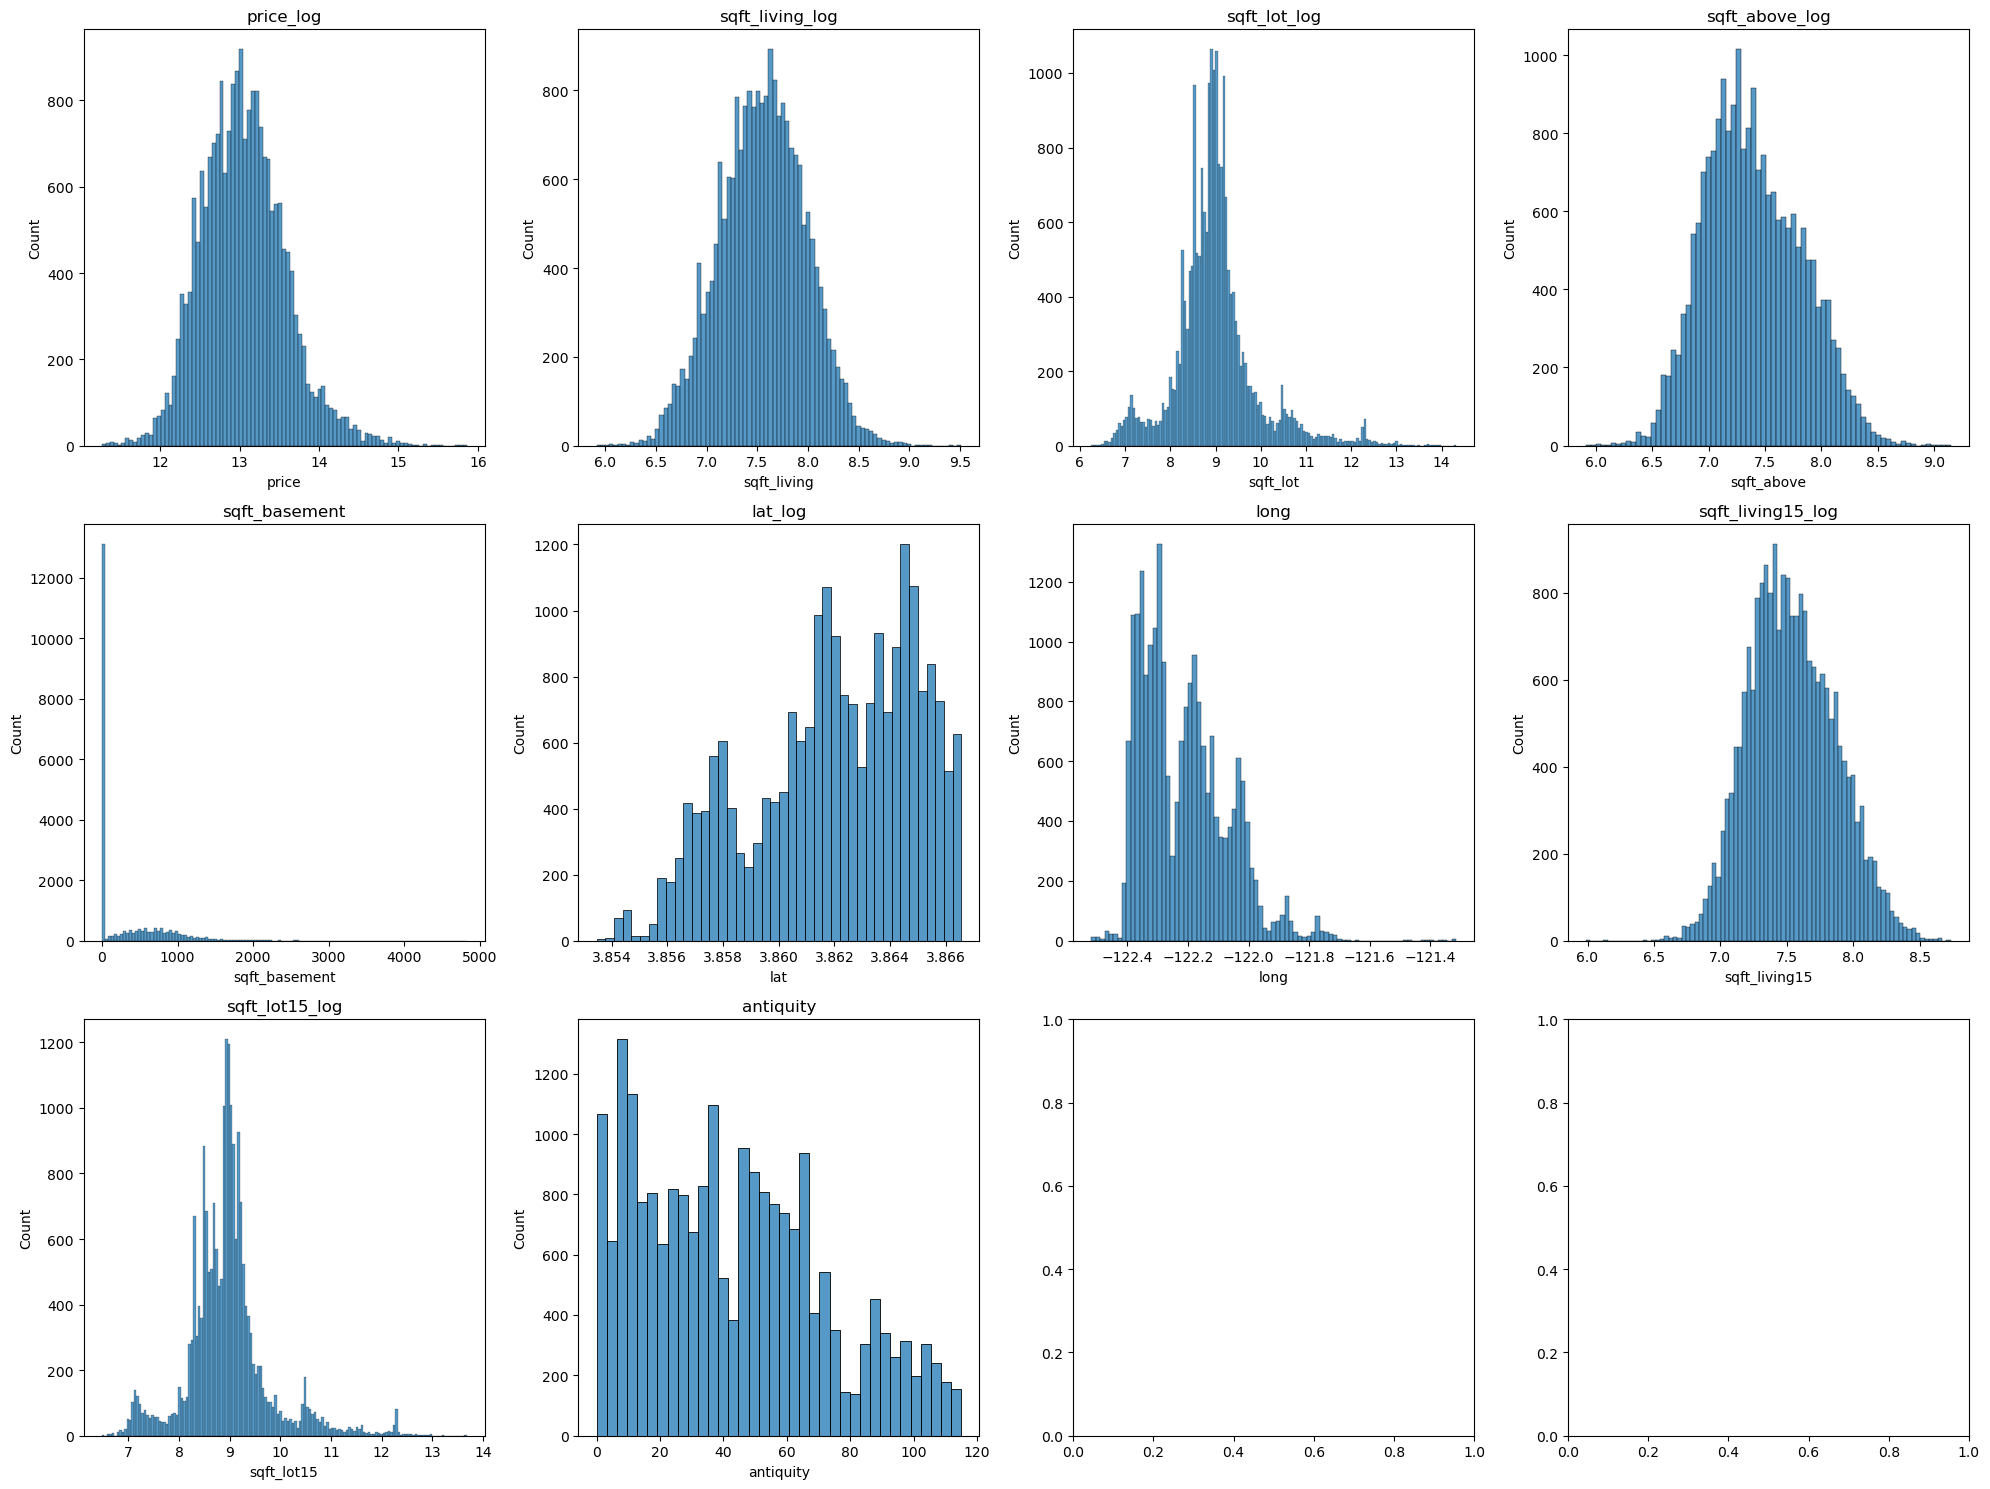

In [212]:
# Histograma con np.log
import numpy as np
# Crear una figura y un subplot
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i, col in enumerate(df_numerico_continuo.columns):
    
    if df[col].min() >0.1:
        # Seleccionar la ubicación del subplot usando i para índice de fila y columna
        sns.histplot(x=np.log(df_numerico_continuo[col]), ax=ax[i // 4, i % 4])
        ax[i//4, i%4].set_title(col + '_log')
    else:
        sns.histplot(x=df_numerico_continuo[col], ax=ax[i // 4, i % 4])
        ax[i//4, i%4].set_title(col)

plt.tight_layout()


- Claramente las distribuciones de los datos mejoran y tienden a asemjearse mayormente a una distribución normal
- sqft_basement no es de mucha ayuda ya que al ser el complemento  de df_above y al estar relacionados con sqft_living no son datos que sean necesario ya que se realza una multicolinealidad

<h1><span style="color: #ff0000;">Eliminando columnas.</span></h1>


In [213]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'antiquity',
       'renovation_yr'],
      dtype='object')

In [214]:
df.corr().loc[:, 'price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702040
grade            0.667938
sqft_above       0.605541
sqft_living15    0.585280
bathrooms        0.526612
view             0.397321
sqft_basement    0.323773
bedrooms         0.316867
lat              0.306775
waterfront       0.266438
floors           0.256855
yr_renovated     0.126494
sqft_lot         0.089882
sqft_lot15       0.082837
yr_built         0.054005
condition        0.035992
long             0.022094
date             0.003748
id              -0.016747
zipcode         -0.053430
antiquity       -0.053947
renovation_yr   -0.053947
Name: price, dtype: float64

<h1>3. Aplicar técnicas de transformación de datos, como normalización o estandarización,
 para asegurar que las variables estén en una escala comparable. Luego de ello,
 divide el conjunto de datos en conjuntos de entrenamiento y prueba de manera
 aleatoria o estratificada</h1>

In [216]:
# Eliminando id debido que es el edintificador unico, sqft_above y sqft_basement
df_model = df.copy()
df_model.drop(columns=['id', 'sqft_above', 'sqft_basement', 'date', 'yr_built', 'yr_renovated', 'antiquity', 'renovation_yr'], inplace=True)


In [217]:
df_model['price'] = np.log(df_model['price'])
df_model['sqft_lot'] = np.log(df_model['sqft_lot'])
df_model['sqft_living15'] = np.log(df_model['sqft_living15'])
df_model['sqft_lot15'] = np.log(df_model['sqft_lot15'])


In [218]:
df_model['sqft_living'] = np.log(df_model['sqft_living'])


In [219]:
df_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,7,98178,47.5112,-122.257,7.200425,8.639411
1,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,3,7,98125,47.7210,-122.319,7.432484,8.941022
2,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,6,98028,47.7379,-122.233,7.908387,8.994917
3,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,98136,47.5208,-122.393,7.215240,8.517193
4,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,8,98074,47.6168,-122.045,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,7.333023,7.030857,3.0,0,0,3,8,98103,47.6993,-122.346,7.333023,7.319202
21609,12.899220,4,2.50,7.745003,8.667852,2.0,0,0,3,8,98146,47.5107,-122.362,7.512071,8.881836
21610,12.904459,2,0.75,6.927558,7.207860,2.0,0,0,3,7,98144,47.5944,-122.299,6.927558,7.604396
21611,12.899220,3,2.50,7.377759,7.778211,2.0,0,0,3,8,98027,47.5345,-122.069,7.251345,7.160069


## Revisando Outliers

In [220]:
def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtro = (df[col] > lower_bound) & (df[col] < upper_bound)
    return df[filtro]


In [221]:
df_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,7,98178,47.5112,-122.257,7.200425,8.639411
1,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,3,7,98125,47.7210,-122.319,7.432484,8.941022
2,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,6,98028,47.7379,-122.233,7.908387,8.994917
3,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,98136,47.5208,-122.393,7.215240,8.517193
4,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,8,98074,47.6168,-122.045,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,7.333023,7.030857,3.0,0,0,3,8,98103,47.6993,-122.346,7.333023,7.319202
21609,12.899220,4,2.50,7.745003,8.667852,2.0,0,0,3,8,98146,47.5107,-122.362,7.512071,8.881836
21610,12.904459,2,0.75,6.927558,7.207860,2.0,0,0,3,7,98144,47.5944,-122.299,6.927558,7.604396
21611,12.899220,3,2.50,7.377759,7.778211,2.0,0,0,3,8,98027,47.5345,-122.069,7.251345,7.160069


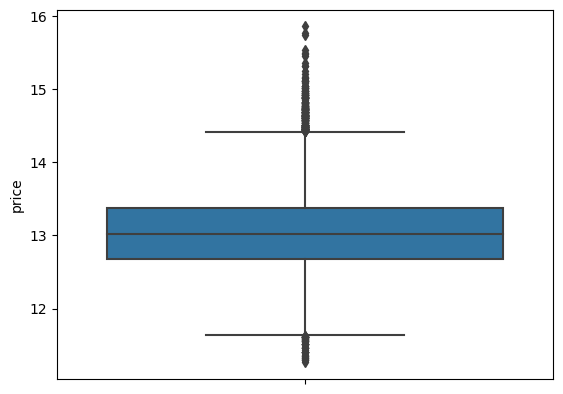

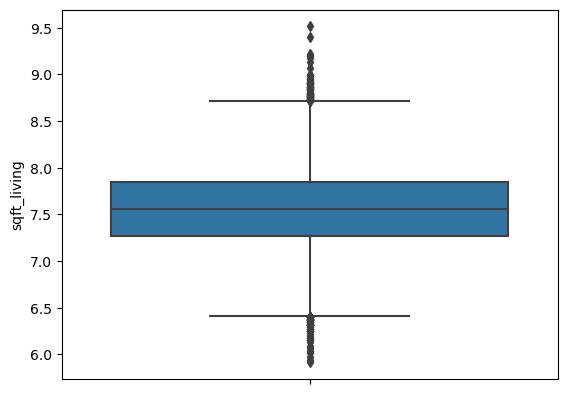

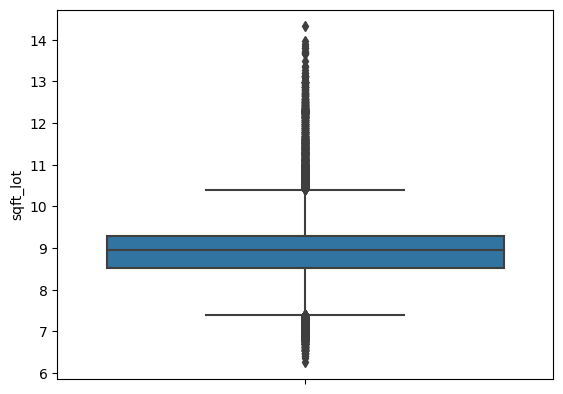

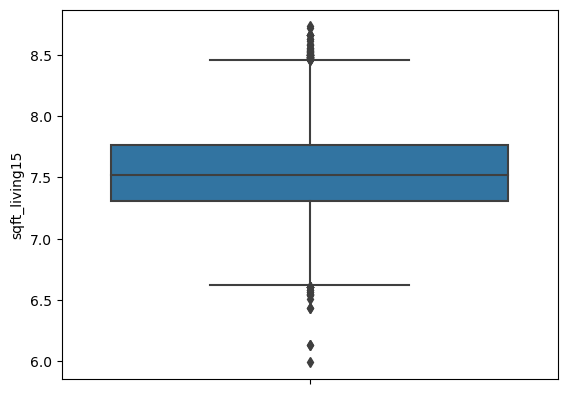

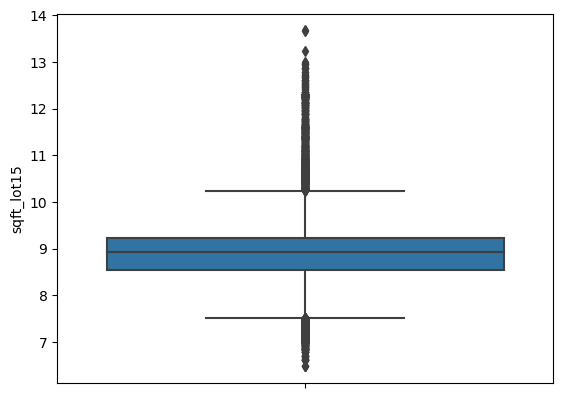

In [222]:
#Iterando por las columnas que previamente cambie a log
columns_numeric_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
for col in columns_numeric_log:
    sns.boxplot(y=col, data=df_model)
    plt.show()

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

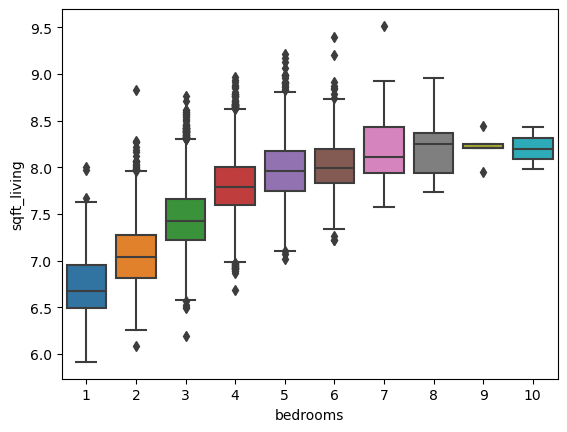

In [51]:
sns.boxplot(data=df_model, x=df_model['bedrooms'], y=df_model['sqft_living'])


### Eliminado los outliers

In [223]:
for col in columns_numeric_log:
    df_model = outliers(df_model, col)

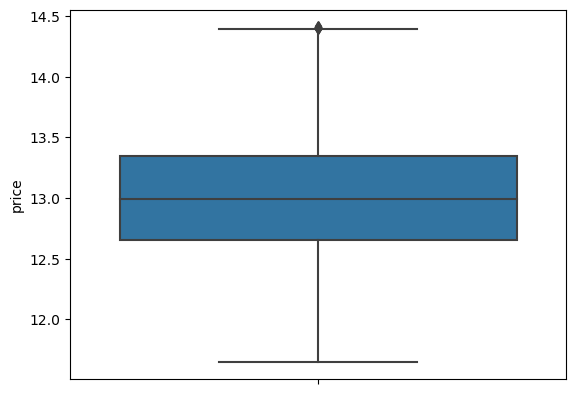

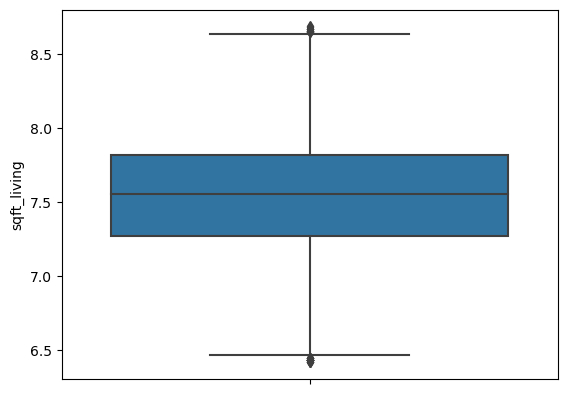

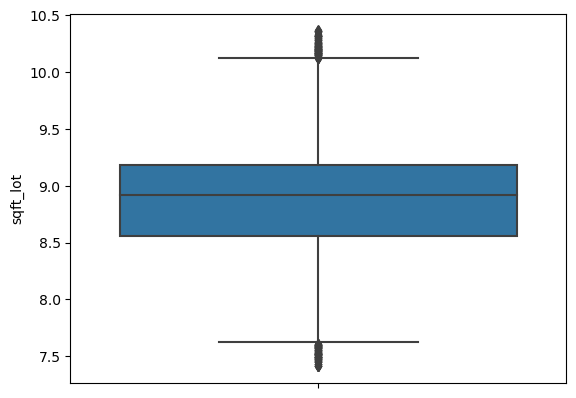

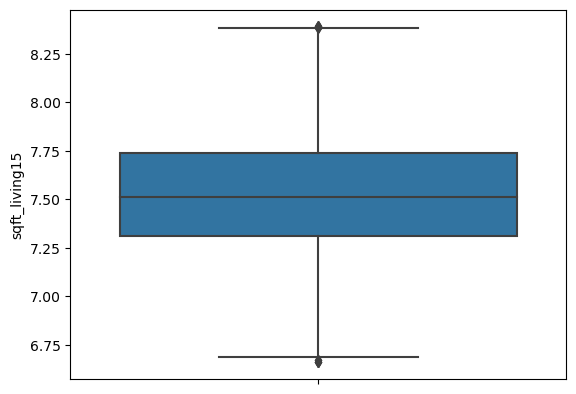

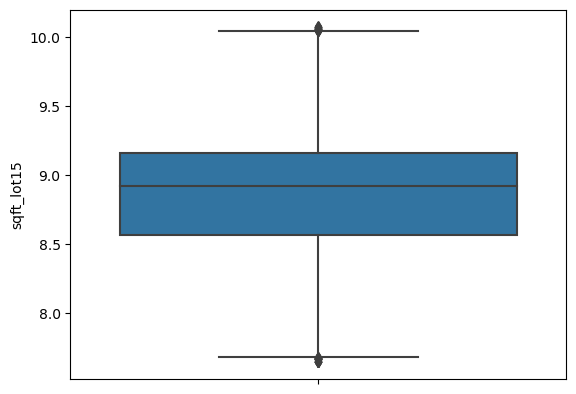

In [224]:
# Revisando los datos sin outliers
for col in columns_numeric_log:
    sns.boxplot(y=col, data=df_model)
    plt.show()

### Bedrooms

<Axes: xlabel='bedrooms', ylabel='price'>

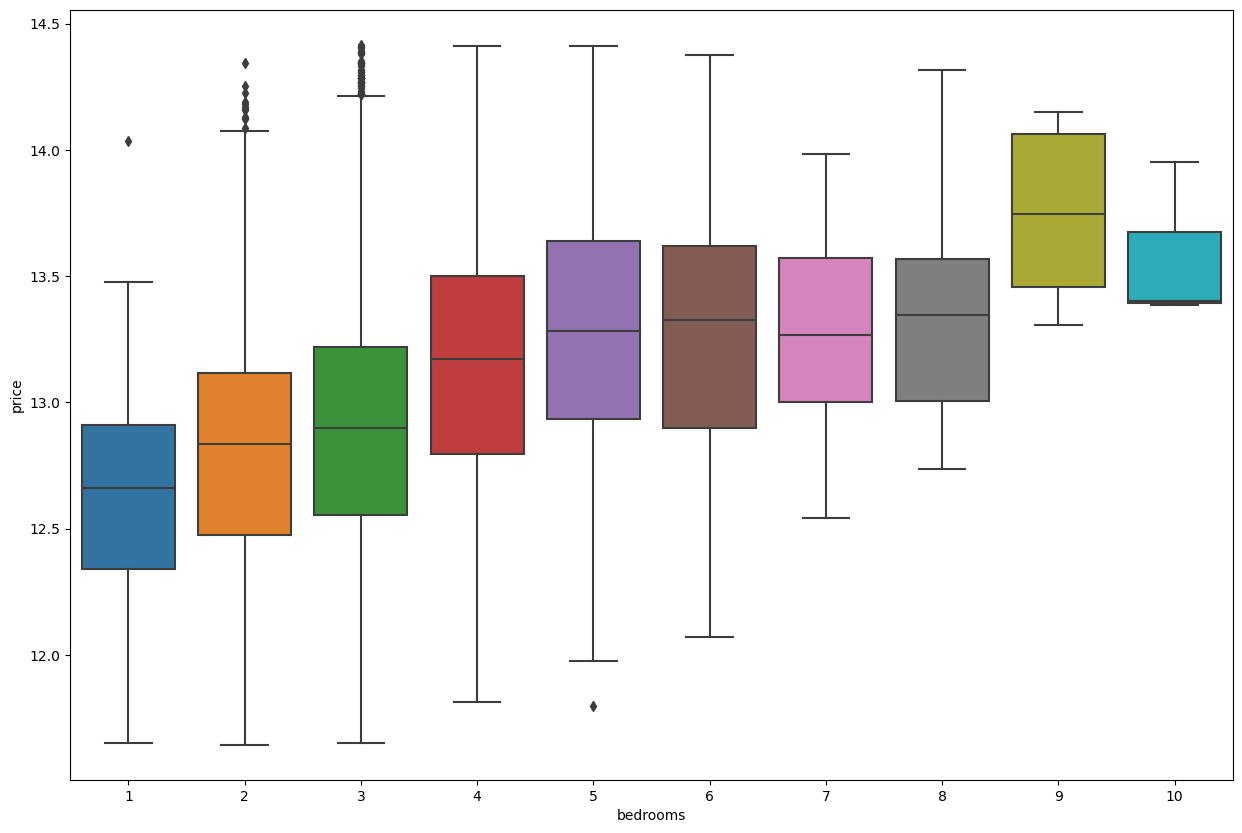

In [225]:
plt.figure(figsize=(15, 10))
sns.boxplot(y = df_model['price'], x=df_model['bedrooms'], data=df_model)

### Sqft_lot

<Axes: xlabel='bedrooms', ylabel='sqft_lot'>

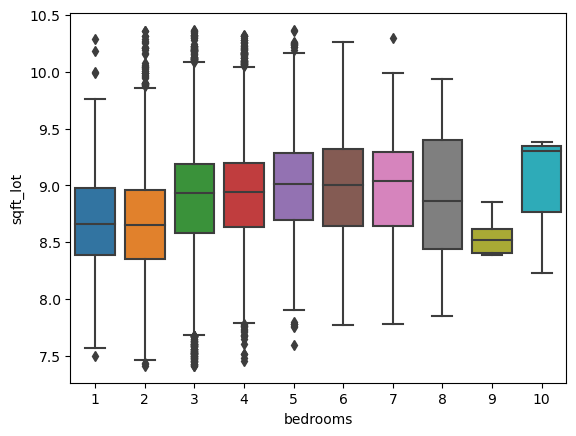

In [226]:
sns.boxplot(y = df_model['sqft_lot'], x=df_model['bedrooms'], data=df)

<Axes: >

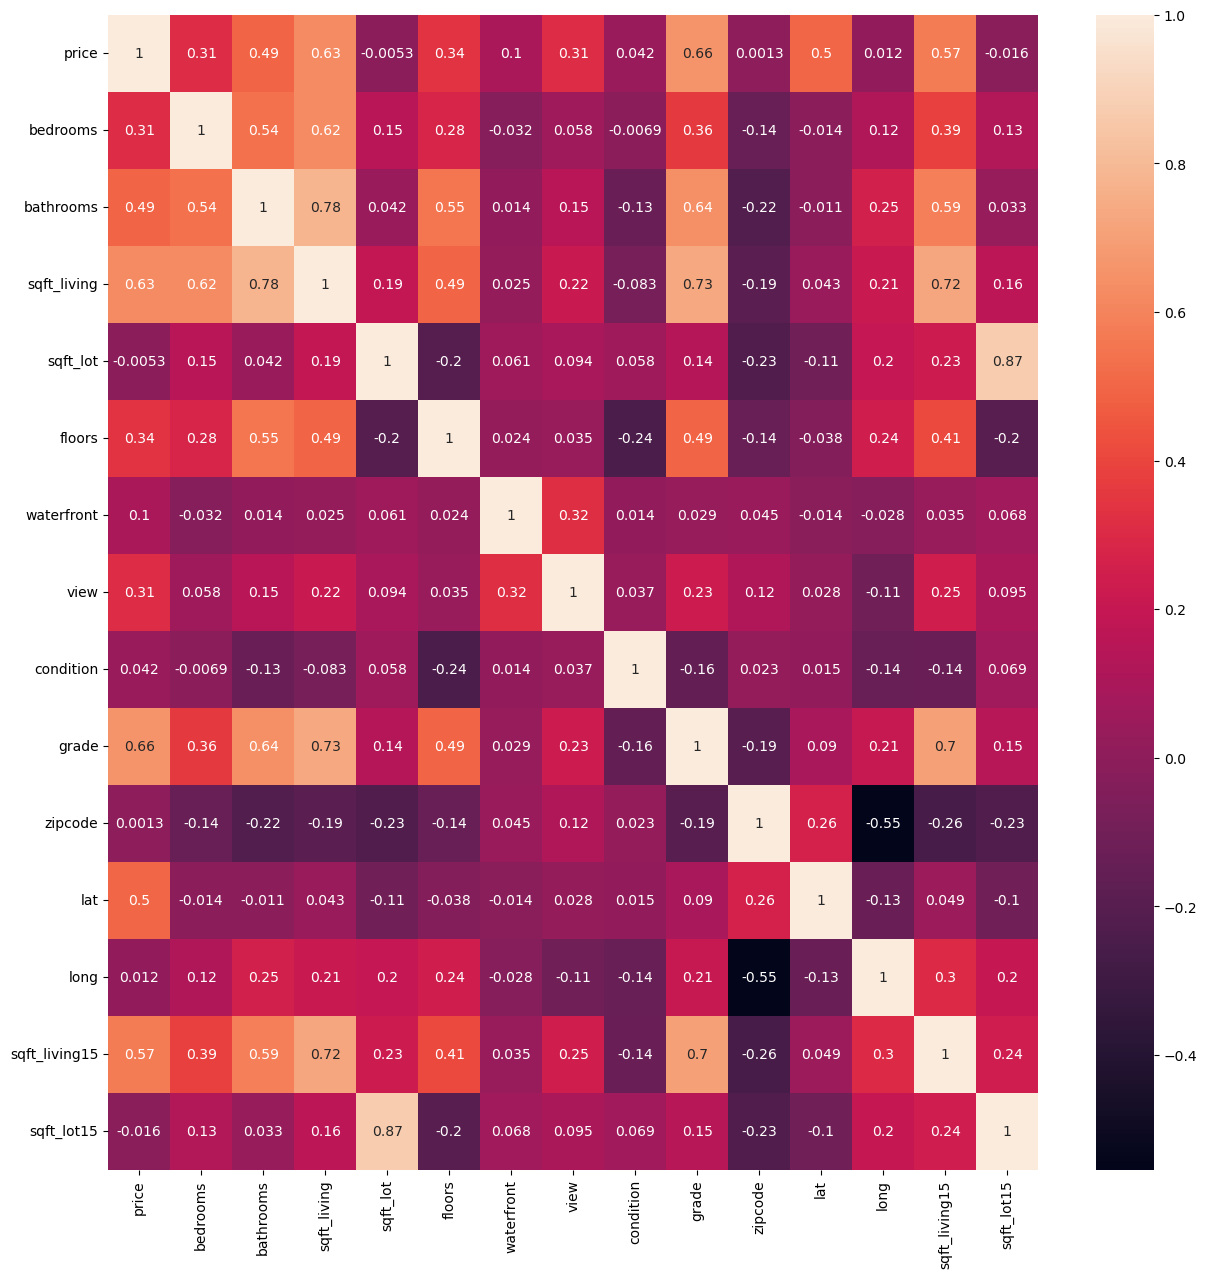

In [227]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_model.corr(), annot=True)

In [228]:
df_model.corr().loc[:, 'price'].sort_values(ascending=False)

price            1.000000
grade            0.657386
sqft_living      0.629022
sqft_living15    0.572803
lat              0.501263
bathrooms        0.492521
floors           0.336908
bedrooms         0.313251
view             0.309559
waterfront       0.100045
condition        0.042147
long             0.012015
zipcode          0.001333
sqft_lot        -0.005255
sqft_lot15      -0.016188
Name: price, dtype: float64

 <h1>4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso o
 Elastic Net y ajuste los hiper parámetros mostrando como se mueve los
 hiperparametros y el ajuste. Además, debes construir modelos de árboles de
 regresión para capturar relaciones no lineales y complejas entre las variables
 predictoras y el precio de las casas.
</h1>

<h1>5. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE),
 el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²), para medir el
 rendimiento del modelo y concluir sobre ellos.</h1>

### Observando primero como se comporta un modelo de regresión lineal

In [229]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# MODELOS
from sklearn.model_selection import KFold
import sklearn.linear_model as lm
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.metrics import r2_score, mean_squared_error

scaler = StandardScaler()


X = df_model.drop(columns=['price'])
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

y = df_model['price']


X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2, random_state = 42)

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

mse = cross_val_score(linear,  X,y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
mse= mean_squared_error(y_test, y_pred)
print(f'El r2 del modelo lineal es de {r2}')
print(f'El rmse es de {mse}')


El r2 del modelo lineal es de 0.7476127546982477
El rmse es de 0.06130631946659966


- El r2 es bastante bueno
- El rmse indica que es bajo

In [230]:
# Predecir utilizando X_train en vez de X_test
y_pred_train = linear.predict(X_train) 
r2_train = r2_score(y_train, y_pred_train)
print(f'El R² del modelo lineal en entrenamiento es de {r2_train}')

print(f'El mse del modelo lineal en entrenamiento es de {mean_squared_error(y_train, y_pred_train)}')


El R² del modelo lineal en entrenamiento es de 0.7390764168254014
El mse del modelo lineal en entrenamiento es de 0.06325529054928618


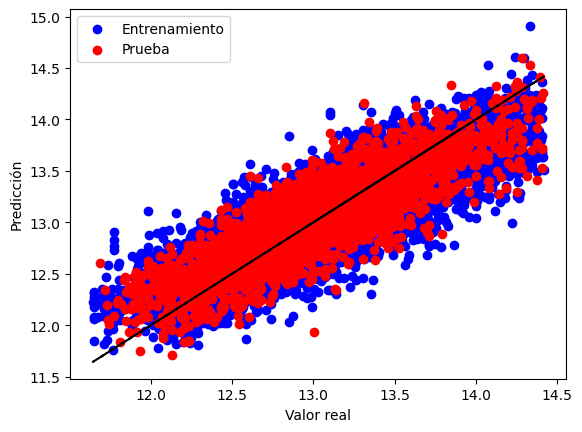

In [231]:
# Gráfico train vs test
# Datos de entrenamiento
plt.scatter(y_train, y_pred_train, color='blue', label='Entrenamiento') 

# Datos de testeo

plt.scatter(y_test, y_pred, color='red', label='Prueba') 


plt.plot(y_train, y_train, color='black', linestyle='dashed') 

plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.legend()
plt.show() 

In [232]:
# Generando una busqueda de scores para hacer un promedio de r2 y saber si los datos se encuentran sobreajustados o no.
# En el caso de que r2 de la validación sea muy lejano al del modelo lineal entonces se podria ver un sobreajuste

kf = KFold(n_splits=10)

scores = []
for train_index, test_index in kf.split(df_scaled):
    X_train, X_test = df_scaled.iloc[train_index], df_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    scores.append(r2_score(y_test, model.predict(X_test)))

# R² promedio
r2_cv = np.mean(scores)

print(f'R² promedio de la validación cruzada: {r2_cv}')

R² promedio de la validación cruzada: 0.7377584279243491


- Debido a que r2 de la validación es pracitamente cercano al r2 del modelo podemos ver que no había sobreajuste (overfitting)

### Buscando el mejor alpha para ridge

Mejor alpha: 10.0
RMSE en el conjunto de prueba: 0.23430312294376782


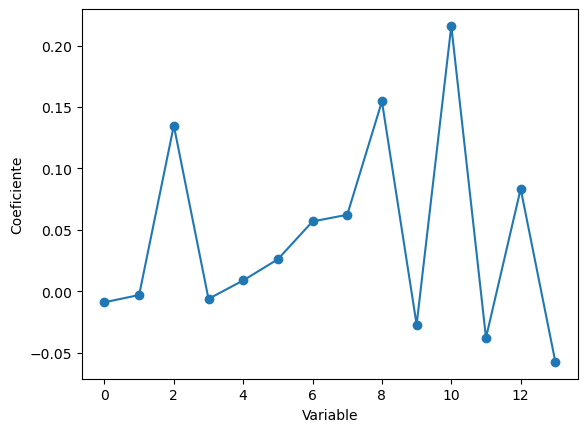

In [233]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

model = RidgeCV(alphas=alphas, cv=5)  

model.fit(X_train, y_train) 

# Obtencion del mejor alpha 
best_alpha = model.alpha_ 

# Evaluacion con el mejor alpha
y_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mejor alpha: {best_alpha}")
print(f"RMSE en el conjunto de prueba: {rmse_test}")

# Grafico de los coeficientes
plt.plot(model.coef_, 'o-')
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.show() 


<h3> Utilizando los mejores parámetros de Ridge </h3>

In [234]:
best_ridge = Ridge(alpha=10)

best_ridge.fit(X_train, y_train)

y_pred_ridge = best_ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression R2 Score:", r2_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

Ridge Regression R2 Score: 0.7631407986264457
Ridge Regression Mean Squared Error: 0.05489795342120238


- Se mejoró el desempeño respecto al modelo lineal y además se bajó el mse

## Generando un modelo con ElasticNetCV

Mejor alpha: 0.01
Mejor l1_ratio: 0.1
RMSE en el conjunto de prueba: 0.23406596619218284


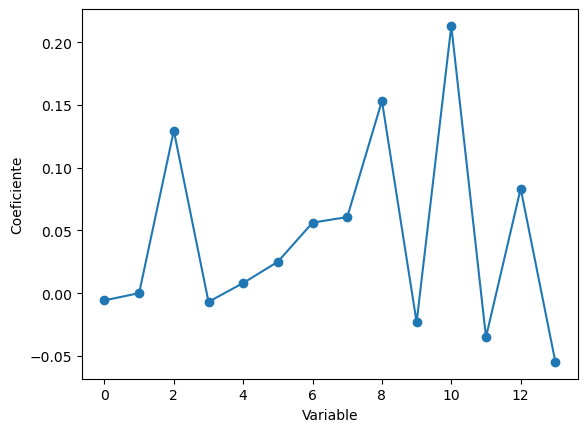

In [235]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

# Define una lista de valores para el parámetro l1_ratio y una para alphas
l1_ratios = [0.1, 0.25, 0.5, 0.75, 0.9]
alphas = [0.01, 0.1, 1.0, 10.0]

# Crea una instancia del modelo ElasticNetCV
model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5)

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Obtencion del mejor alpha y l1_ratio
best_alpha = model.alpha_
best_l1_ratio = model.l1_ratio_

# Evaluacion con el mejor alpha y l1_ratio
y_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mejor alpha: {best_alpha}")
print(f"Mejor l1_ratio: {best_l1_ratio}")
print(f"RMSE en el conjunto de prueba: {rmse_test}")

# Grafico de los coeficientes
plt.plot(model.coef_, 'o-')
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.show()


In [236]:
# Define el mejor alpha y l1_ratio encontrados
best_alpha = 0.01
best_l1_ratio = 0.1

model_best = ElasticNetCV(l1_ratio=best_l1_ratio, cv=5)

# Entrena el modelo con los datos de entrenamiento
model_best.fit(X_train, y_train)

# Evaluación del modelo con los mejores parámetros
y_pred_best = model_best.predict(X_test)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_elastic = r2_score(y_test, y_pred_best)

print("Elastic R2:", r2_elastic)
print(f"RMSE en el conjunto de prueba con los mejores parámetros: {rmse_test_best}")


Elastic R2: 0.7634002093027344
RMSE en el conjunto de prueba con los mejores parámetros: 0.2341747821778832


<h3> Instanciando Modelo Lasso y buscando mejores parámetros </h3>


In [237]:
lasso=Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1, 5, 10, 20, 30, 40, 45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [238]:
best_estimator = lasso_regressor.best_estimator_
best_score = lasso_regressor.best_score_

print(best_estimator)
print(best_score)

Lasso(alpha=1e-15)
-0.06394887353121904


<h3> Utilizando los mejores parámetros de Lasso para instanciar el modelo </h3>


In [239]:
best_lasso = Lasso(alpha=1e-15)

best_lasso.fit(X_train, y_train)

y_pred_lasso = best_lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Lasso Regression R2 Score:", r2_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

Lasso Regression R2 Score: 0.7631605016771033
Lasso Regression Mean Squared Error: 0.05489338675395455


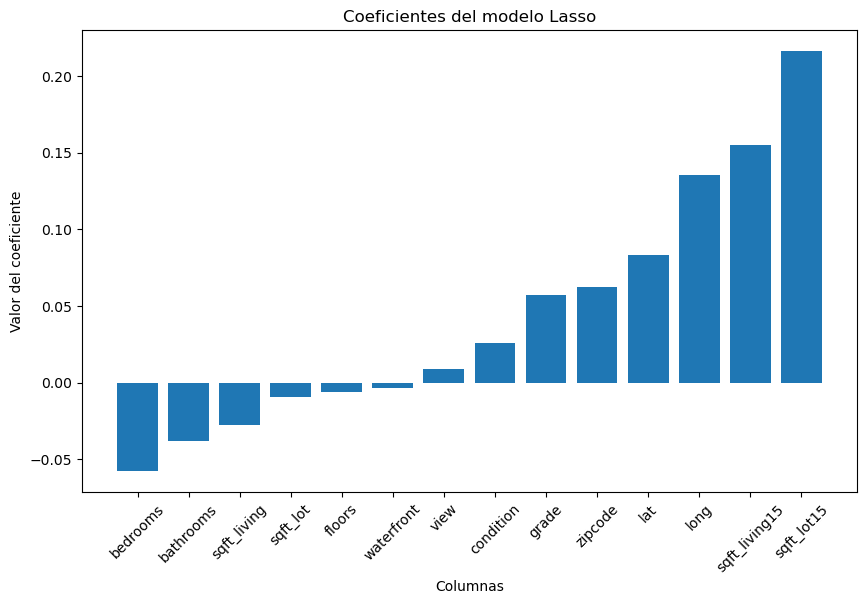

In [240]:
coeficientes = best_lasso.coef_

# Grafica los coeficientes
plt.figure(figsize=(10, 6))
plt.bar(X.columns, sorted(coeficientes))
plt.xlabel('Columnas')
plt.ylabel('Valor del coeficiente')
plt.title('Coeficientes del modelo Lasso')
plt.xticks(rotation=45)
plt.show()

In [241]:
def cv_error(X_train, y_train, k, method = 'OLS', alpha = 1):

    # definimos los conjuntos de datos respectivos
    Xm, ym = X_train, y_train
    # creamos un objeto kFold para realizar la validación cruzada
    kf = KFold(n_splits=k)
    #Inicializamos rmse_cv a cero. Esta variable se utilizará para almacenar
    #la suma de los errores cuadráticos medios (RMSE) en cada iteración
    #de la validación cruzada.
    rmse_cv = 0
    # creamos una lista para almacenar los coeficientes
    coef_v = []

    # seleccionamos el método de regresión qu9e se utilizará
    if method == 'OLS':
        method_type = lm.LinearRegression(fit_intercept=False)
    elif method == 'ridge':
        method_type = lm.Ridge(alpha=alpha, fit_intercept=False)
    elif method == 'lasso':
        method_type = lm.Lasso(alpha = alpha, fit_intercept=False)
    elif method == 'enet':
        method_type = lm.ElasticNet(alpha=alpha, fit_intercept=False)
    else:
        #indicamos error, si es el caso
        raise TypeError("Method argument is not valid")

    #para cada particion:
    for train_index, validation_index in kf.split(Xm):
        # instanciamos el modelo
        method_type = method_type
        #ajustamos segun el modelo
        method_type.fit(Xm.iloc[train_index,], ym.iloc[train_index,])
        # almacenamos los coeficientes
        coef_v.append(method_type.coef_)
        # creamos las prediciones
        yhat_validation = method_type.predict(Xm.iloc[validation_index])
        # recalculamos rmse
        rmse_cv += np.mean(np.power(np.array(yhat_validation) - np.array(ym.iloc[validation_index]), 2))

    return rmse_cv

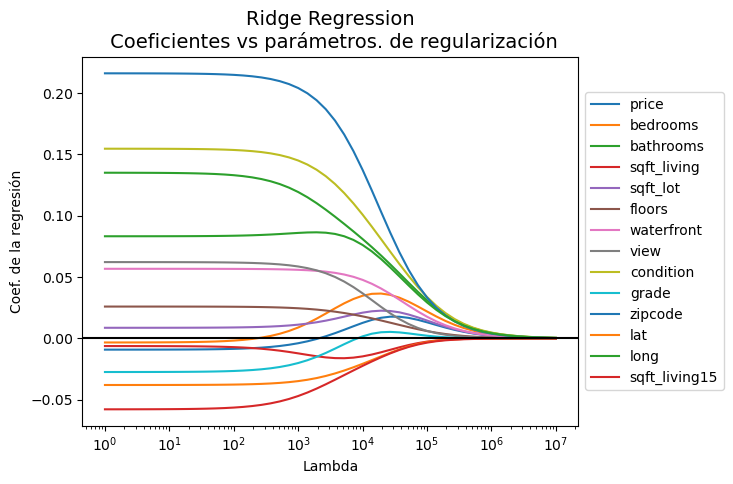

In [242]:
names_regressors = df_model.columns # guardamos los nombres de los atributos

alphas = np.logspace(0, 7, base = 10) # generamos un vector con los valores de la norma
coefs_ridge = [] #lista para guardar parámetros
cv_err_ridge = [] #lista para guardar parámetros
model_ridge = Ridge(fit_intercept = True) # instanciamos el modelo
tol = 0.1 # determinamos el umbral de tolerancia

# para cada valor en el vector
for a in alphas:
    # estimamos el modelo con este valor
    model_ridge.set_params(alpha = a)
    model_ridge.fit(X_train, y_train)
    # guardamos el coeficiente estimado
    coefs_ridge.append(model_ridge.coef_)
    # generamos su estimado de validación cruzada
    cv_err_estimates = cv_error(X_train, y_train, k = 10, method = 'ridge', alpha = a)
    cv_err_ridge.append(np.mean(cv_err_estimates)) # OJO: estamos guardando la media del error de cv para cada alpha

names_regressors = df_model.columns

for y_arr, label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label = label)
plt.legend()
plt.xscale("log")
plt.title("Ridge Regression\n Coeficientes vs parámetros. de regularización",
size = 14)
plt.axhline(0, color='black')
plt.xlabel('Lambda')
plt.ylabel('Coef. de la regresión')
plt.axis("tight")
plt.legend(loc="center left", bbox_to_anchor=(1, .5));

In [243]:
from sklearn.feature_selection import SelectFromModel

model = ElasticNetCV(l1_ratio=0.5, max_iter=10000)
model.fit(X_train, y_train)

selector = SelectFromModel(model, threshold=0.01)
selected_features = selector.get_support()

print("Variables Seleccionadas:", X.columns[selected_features])

Variables Seleccionadas: Index(['sqft_living', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


- En teoria con esas serian las variable sque deberia usar para el modelo

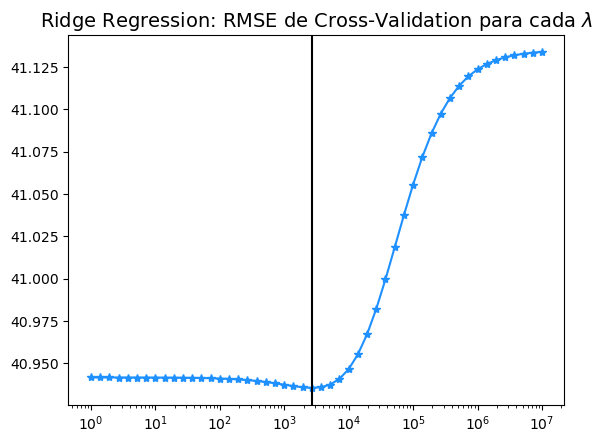

In [244]:
plt.plot(alphas, np.sqrt(cv_err_ridge),"*-", color='dodgerblue')
plt.axvline(alphas[np.argmin(np.sqrt(cv_err_ridge))], color='black', label='Minimo error')
plt.xscale("log")
plt.title("Ridge Regression: RMSE de Cross-Validation para cada $\lambda$", fontsize = 14);

## DecisionTreeRegressor

In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Crea el modelo
tree_regressor = DecisionTreeRegressor(max_depth=5)

tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

r2_tree = r2_score(y_test, y_pred)

# Calcula el error cuadrático medio en validación
mse_tree = mean_squared_error(y_test, y_pred)

print("R² en validación:", r2_tree)
print("MSE en validación:", mse_tree)

R² en validación: 0.7486804111079653
MSE en validación: 0.058249504367243445


# TABLA RESUMEN DE LOS MODELOS

 <table>
    <tr>
      <th>Modelo</th>
      <th>R²</th>
      <th>RMSE</th>
    </tr>
    <tr>
      <td>Linear Regression</td>
      <td>0.7476</td>
      <td>0.0613</td>
    </tr>
    <tr>
      <td>Ridge Regression</td>
      <td>0.7631</td>
      <td>0.05489</td>
    </tr>
    <tr>
      <td>ElasticNetCV</td>
      <td>0.7634</td>
      <td>0.2341</td>
    </tr>
    <tr>
      <td>Lasso Regression</td>
      <td>0.7638</td>
      <td>0.05489</td>
    </tr>
    <tr>
      <td>Decision Tree</td>
      <td>0.7486</td>
      <td>0.05824</td>
    </tr>
  </table>

- Ridge, Lasso y ElasticNetCV tienen un R² similar, con una ligera ventaja para Lasso y ElasticNetCV. Sin embargo, Ridge y Lasso tienen un RMSE significativamente menor que ElasticNetCV, lo que indica que son más precisos en la predicción del precio de las viviendas.
- El Árbol de Decisión tiene un R² comparable a la Regresión Lineal, pero un RMSE ligeramente mayor. Esto sugiere que la Regresión Lineal, Ridge, Lasso y ElasticNetCV podrían ser más adecuados para este conjunto de datos
